TF : https://medium.com/@kumon/visualizing-image-feature-vectors-through-tensorboard-b850ce1be7f1    https://projector.tensorflow.org/

https://stackoverflow.com/questions/42867400/python-show-image-upon-hovering-over-a-point

In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np; np.random.seed(42)

from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
sns.set_style('white')

In [2]:
%matplotlib notebook

In [3]:

# Generate data x, y for scatter and an array of images.
x = np.arange(20)
y = np.random.rand(len(x))
arr = np.empty((len(x),10,10))
for i in range(len(x)):
    f = np.random.rand(5,5)
    arr[i, 0:5,0:5] = f
    arr[i, 5:,0:5] =np.flipud(f)
    arr[i, 5:,5:] =np.fliplr(np.flipud(f))
    arr[i, 0:5:,5:] = np.fliplr(f)

<IPython.core.display.Javascript object>


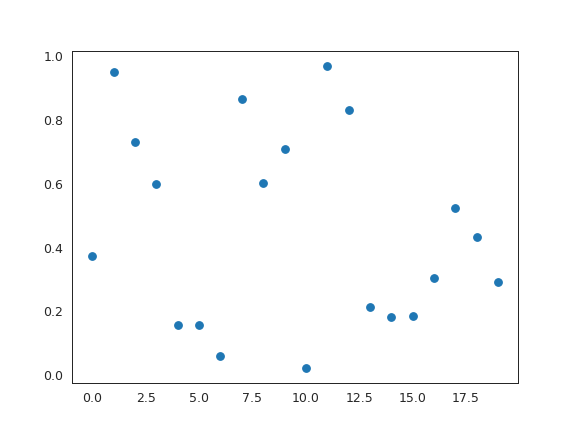

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(x,y, ls="", marker="o")

# create the annotations box
im = OffsetImage(arr[0,:,:], zoom=5)
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)

def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        # find out the index within the array from the event
        ind, = line.contains(event)[1]["ind"]
        # get the figure size
        w,h = fig.get_size_inches()*fig.dpi
        ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        # make annotation box visible
        ab.set_visible(True)
        # place it at the position of the hovered scatter point
        ab.xy =(x[ind], y[ind])
        # set the image corresponding to that point
        im.set_data(arr[ind,:,:])
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover)           
plt.show()

https://mplcursors.readthedocs.io/en/stable/

<IPython.core.display.Javascript object>


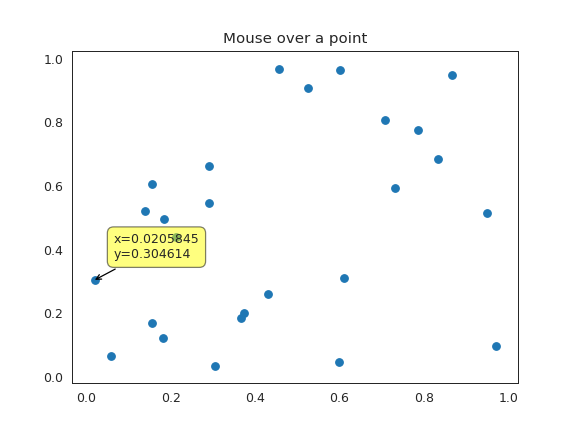

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
np.random.seed(42)

fig, ax = plt.subplots()
ax.scatter(*np.random.random((2, 26)))
ax.set_title("Mouse over a point")

mplcursors.cursor(hover=True)

plt.show()

<IPython.core.display.Javascript object>


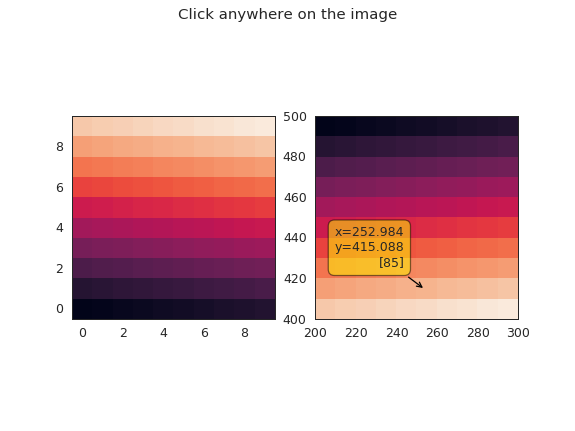

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

data = np.arange(100).reshape((10, 10))

fig, axes = plt.subplots(ncols=2)
axes[0].imshow(data, interpolation="nearest", origin="lower")
axes[1].imshow(data, interpolation="nearest", origin="upper",
                     extent=[200, 300, 400, 500])
mplcursors.cursor()

fig.suptitle("Click anywhere on the image")

plt.show()